In [1]:
!pip install numpy pandas matplotlib scipy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import lti, step
import os

# System parameters
L = 660e-6
C = 20e-6
R = 6
vi = 12
duty_cycle = 0.5

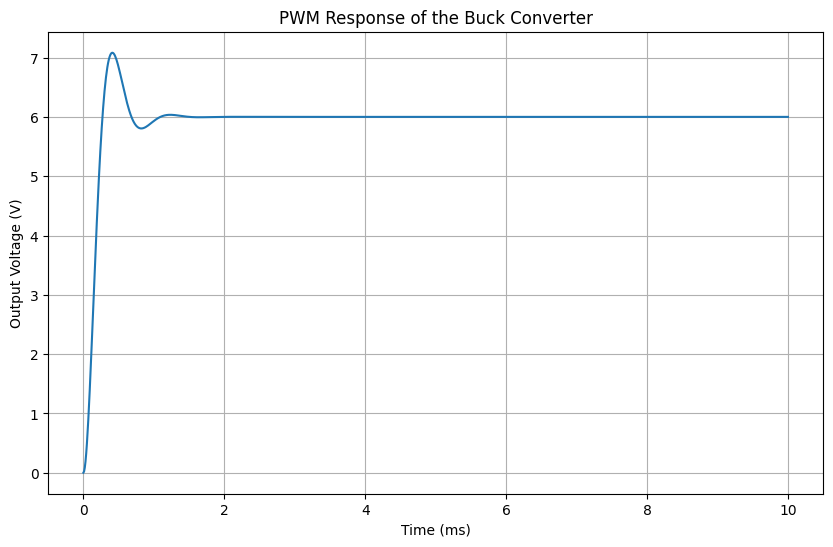

The steady-state output voltage is: 6.00 V


In [3]:
# Define the transfer function
# The transfer function is given as Vb(s)/D(s) = vi / (L*C*s^2 + (L/R)*s + 1)
numerator_coeffs = [vi]
denominator_coeffs = [L * C, L / R, 1]

# Create the LTI system
sys = lti(numerator_coeffs, denominator_coeffs)

# The input is a step function with a magnitude equal to the duty cycle
time_points = np.linspace(0, 0.01, 1000)

# Corrected unpacking to expect only two values
time, response = step(sys, T=time_points, X0=0)
response = response * duty_cycle

# Plot the response
plt.figure(figsize=(10, 6))
plt.plot(time * 1000, response)
plt.title('PWM Response of the Buck Converter')
plt.xlabel('Time (ms)')
plt.ylabel('Output Voltage (V)')
plt.grid(True)
plt.show()

# Print the steady-state value
steady_state_value = vi * duty_cycle
print(f'The steady-state output voltage is: {steady_state_value:.2f} V')

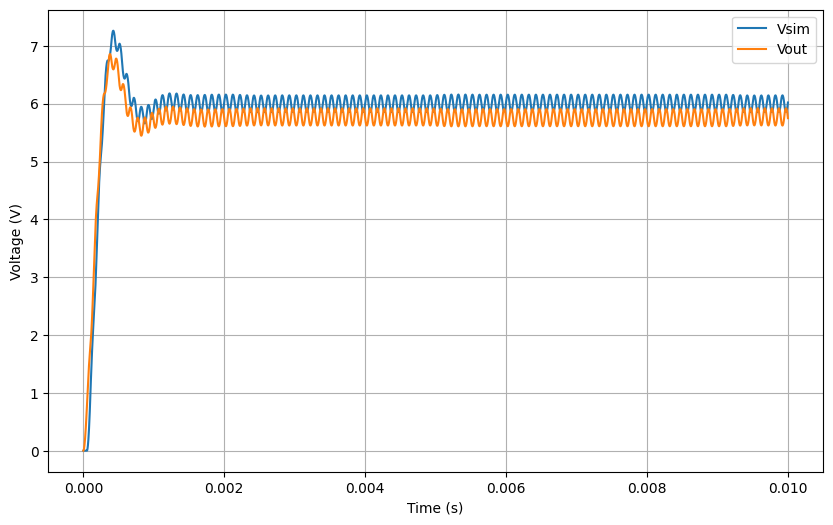

Mean Squared Error (MSE): 0.11691689933675134
Mean Absolute Error (MAE): 0.2694069868531669
Root Mean Square (RMS): 0.34193113244738527


In [4]:
filepath = os.path.join(os.getcwd(), 'Traces.csv')

df = pd.read_csv(filepath)

t = df['Time'].to_numpy()
Vsim = df['Vsim'].to_numpy()
Vout = df['Vout'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(t, Vsim, label='Vsim')
plt.plot(t, Vout, label='Vout')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.show()


#MSE

mse = np.mean((Vsim - Vout) ** 2)
print("Mean Squared Error (MSE):", mse)

#MAE

mae = np.mean(np.abs(Vsim - Vout))
print("Mean Absolute Error (MAE):", mae)

#RMS

rms = np.sqrt(np.mean((Vsim - Vout) ** 2))
print("Root Mean Square (RMS):", rms)